In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import os
import sys
from datetime import datetime, timedelta

In [2]:
# Add the library to the path
sys.path.append(r"C:\ERDC\BarSed")

# Import the library modules

from lib.data_classes.Run import Run
from lib.data_classes.WaveGauge import WaveGauge
from lib.data_classes.WaveMaker import WaveMaker

In [3]:
# Set the important paths
barsed_data_path = r"D:\ERDC\BarSed"

# Name of the folder containing the wave data
WG_data_folder_name = r"WG" 

# Path to where I'm storing the bathymetry data
WG_data_path = os.path.join(barsed_data_path, WG_data_folder_name)

print(f"Bathy file path: {WG_data_path}")

Bathy file path: D:\ERDC\BarSed\WG


In [4]:
# Run number
run_number = "041"

# Run id
run_id = f"RUN{run_number}"

# Mat file for the first run
run_001_name = r"{}.mat".format(run_id)

# Path to the first run
run_001_path = os.path.join(WG_data_path, run_001_name)

print("Run001 mat file path: {}".format(run_001_path))

Run001 mat file path: D:\ERDC\BarSed\WG\RUN041.mat


In [5]:
test_run = Run(id = run_id, wave_file_path=run_001_path, ADV_file_path=None)

In [6]:
test_run.load_wave_data()

New Number of 17 wave gauges


In [7]:
# Load the mat file
run_001_dict = scipy.io.loadmat(run_001_path, variable_names = ["date", "eta", "x", "y", "eta_wm", "x_wm"])

# Show the keys
print(run_001_dict.keys())


# Display the dict
display(type(run_001_dict["eta"]))
# Store the data

# Display the data

dict_keys(['__header__', '__version__', '__globals__', 'eta'])


numpy.ndarray

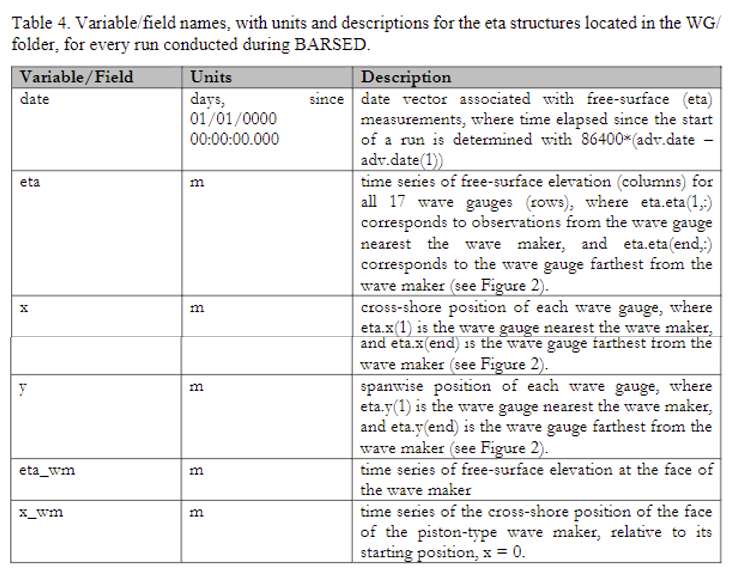

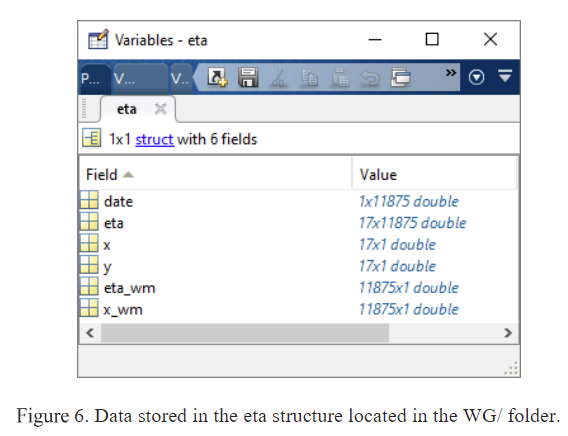

Notes on the Wave Gauges:

* There are a total of 17 wave gauges
* First 3 are self calibrating [0->2]
* Next 8 are fixed square wave gauges [3->10]
* Next 6 are ultrasonic wave gauges [11->16]

In [9]:
eta = run_001_dict["eta"]["eta"][0][0]

display(eta.shape)
display(eta)


(17, 11875)

array([[-3.2520e-04, -2.5105e-04, -2.1397e-04, ..., -3.8845e-03,
        -4.0699e-03, -4.2182e-03],
       [-2.1485e-04, -3.6147e-04, -4.3477e-04, ..., -2.2674e-03,
        -2.7439e-03, -3.5137e-03],
       [-6.0051e-04, -4.5514e-04, -3.8246e-04, ..., -1.2702e-02,
        -1.2775e-02, -1.2884e-02],
       ...,
       [ 0.0000e+00, -1.0000e-04, -1.0000e-04, ...,  8.6000e-03,
         8.1000e-03,  7.6000e-03],
       [ 0.0000e+00,  1.0000e-04,  2.0000e-04, ..., -1.3100e-02,
        -1.3300e-02, -1.3600e-02],
       [ 0.0000e+00, -4.0000e-05, -7.0000e-05, ...,  1.2100e-03,
         1.2100e-03,  1.2100e-03]])

In [10]:
x_loc = run_001_dict["eta"]["x"][0][0].flatten()

display(x_loc.shape)
display(x_loc)


(17,)

array([17.728, 25.037, 32.342, 35.895, 39.556, 43.215, 46.876, 50.53 ,
       54.192, 57.85 , 61.509, 65.205, 68.759, 72.405, 76.068, 79.738,
       83.385])

In [11]:
y_loc = run_001_dict["eta"]["y"][0][0].flatten()

display(y_loc.shape)
display(y_loc)

(17,)

array([-1.269, -1.271, -1.268, -1.383, -1.369, -1.374, -1.372, -1.366,
       -1.37 , -1.37 , -1.368, -1.327, -1.367, -1.359, -1.369, -1.355,
       -1.37 ])

In [12]:
eta_wm = run_001_dict["eta"]["eta_wm"][0][0].flatten()

# Collect the x-position of the 
x_wm = run_001_dict["eta"]["x_wm"][0][0].flatten()

In [13]:
# Store the information for the Wave Gauges
wave_gauge_list = []

for id, location in enumerate(zip(x_loc, y_loc)):
    
    # Create the wave gauge
    wave_gauge = WaveGauge(id + 1, location, eta[id], experiment_datetime)
    
    # Store the wave gauge in the list
    wave_gauge_list.append(wave_gauge)

In [ ]:
# Store the information for the Run

wave_maker = WaveMaker(eta_wm, x_wm, experiment_datetime)
# Get the date the experiment started on
date = experiment_datetime[0].date()

Run_list = []
Run_list.append(Run(run_id, date, experiment_datetime))

Run_list[0].add_wave_gauge(wave_gauge_list)
Run_list[0].add_wave_maker(wave_maker)

New Number of 17 wave gauges


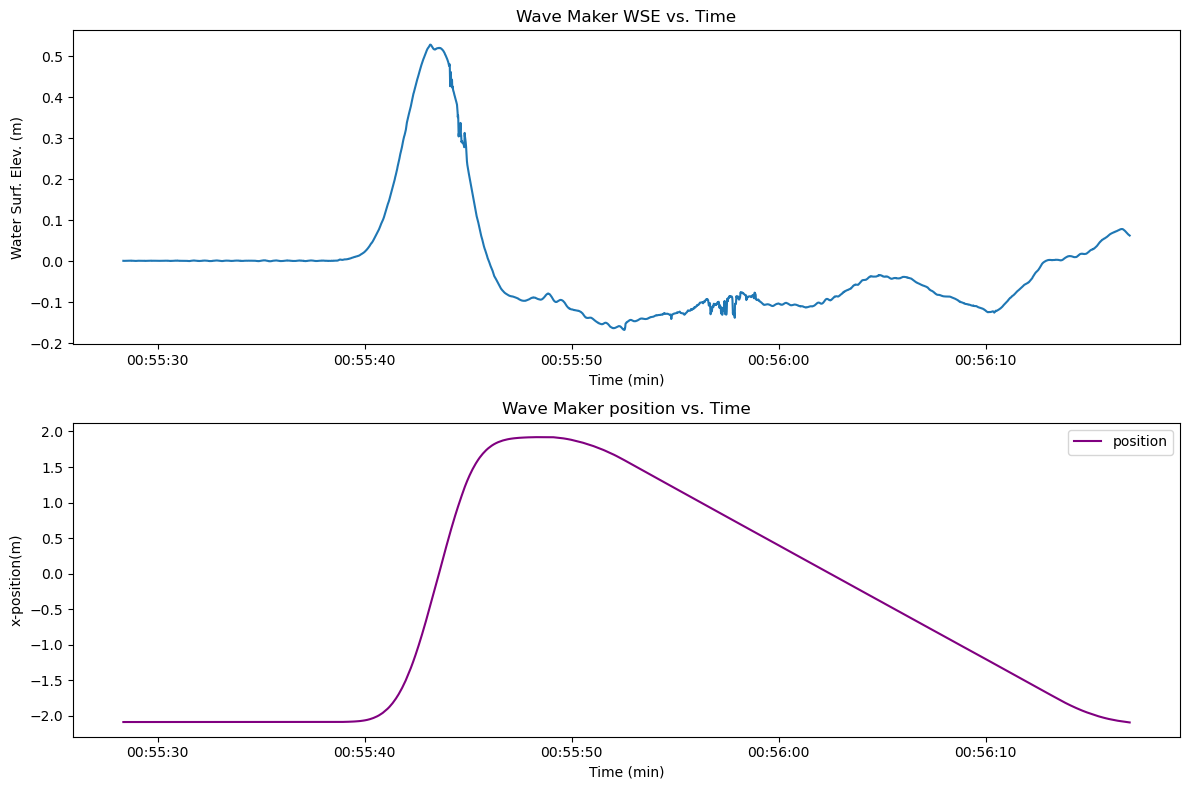

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize= (12, 8))

# Plot the water surface elevation in front of the wave maker
test_run.wave_maker.quick_wse_plot(axs = axs[0])
test_run.wave_maker.quick_position_plot(axs= axs[1], color = "purple", label ="position", legend = True)

plt.tight_layout()

In [ ]:
# wse -> Water Surface Elevation

# Construct the wse elevation as mesured by the wave gauges 
# (doesn't include wave maker)
test_run.construct_wave_gauge_wse()

# Make an array of all the wave gauge locations
test_run.get_wave_gauge_locations()

# Construct the elevation of the flume as measured by the wave gauges and 
# the wave maker
test_run.construct_flume_wse()

AttributeError: 'Run' object has no attribute 'num_times'

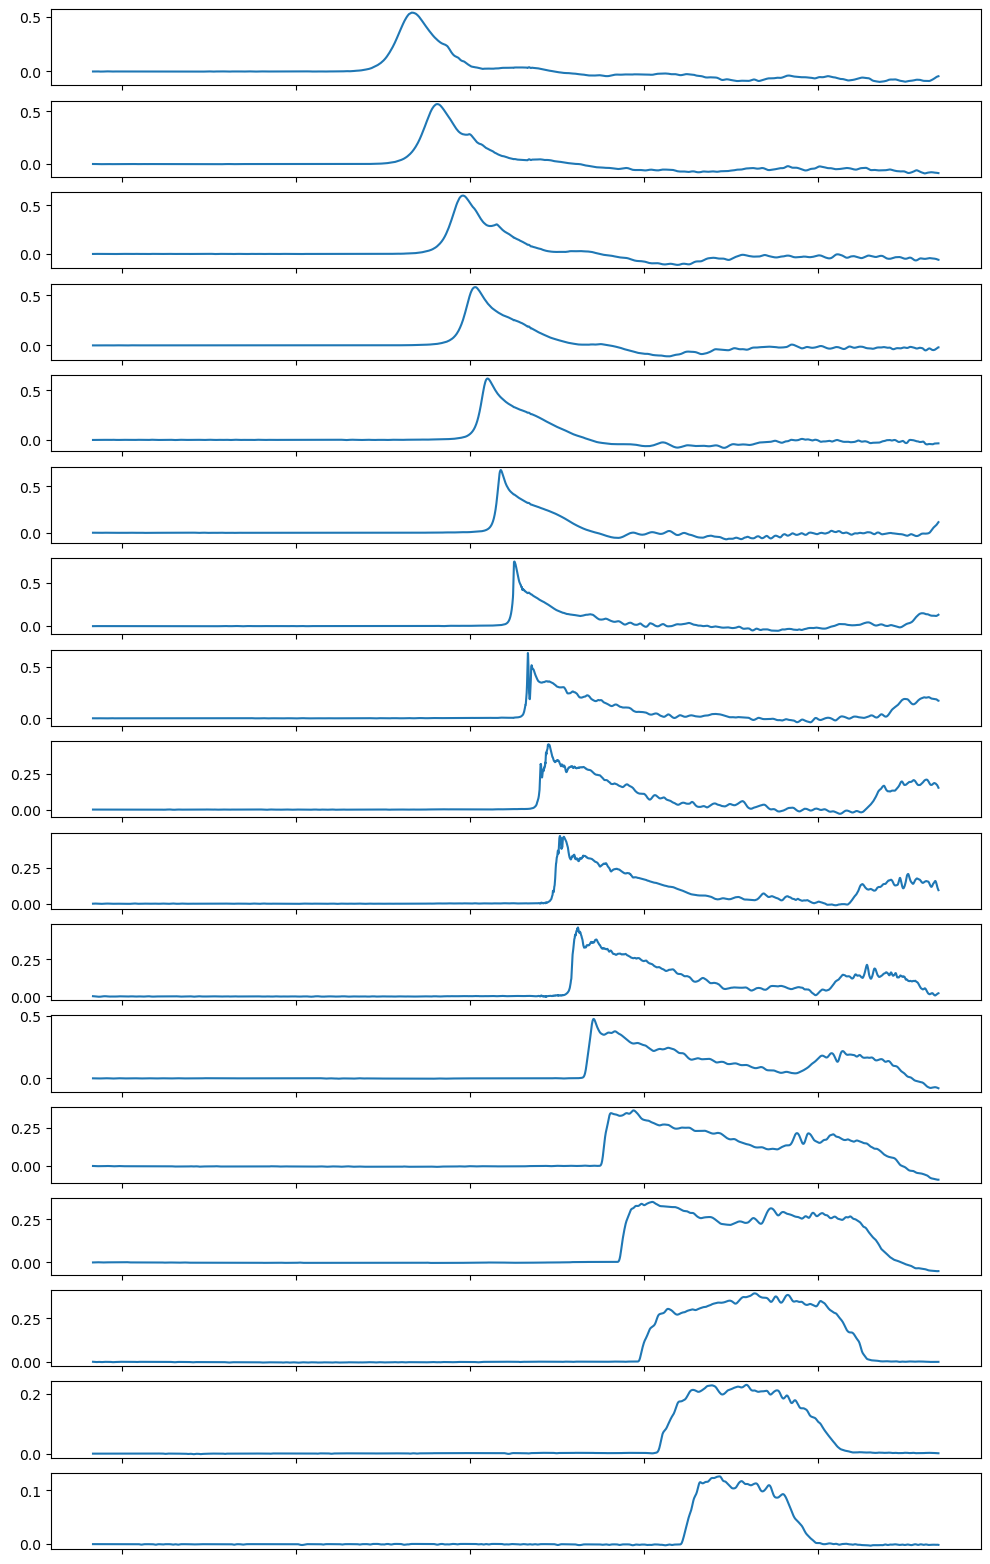

In [ ]:
gauge_ids= [val for val in range(1, 18)]
Run_list[0].quick_plot_wave_gauges(gauge_ids= gauge_ids, xlabel = False, ylabel=False, figsize = (12, 20))

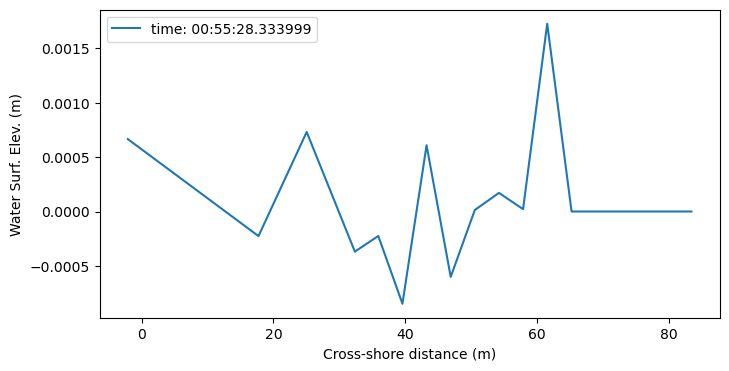

In [ ]:
Run_list[0].quick_flume_wse_plot(time_index = 0, legend = True)

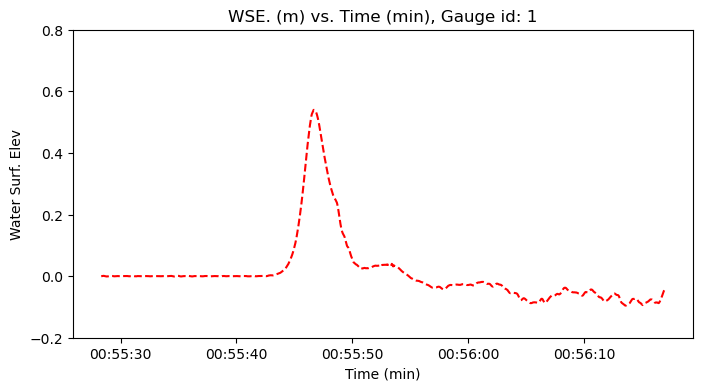

In [ ]:
Run_list[0].wave_gauges[0].quick_plot(color=  "red", ylim= (-0.2, 0.8), linestyle = "--")